In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.rename(columns={'W':'Predicted Wins','R':'Runs','AB':'At Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'Stolen Bases','RA':'Runs Allowed','ER':'Earned Runs','ERA':'Earned Run Average', 'CG':'Compelete Games','SHO':'Shutouts','SV':'Saves', 'E':'Error'},inplace=True)

In [5]:
df

,Predicted Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Compelete Games,Shutouts,Saves,Error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [6]:
df.columns

Index(['Predicted Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed',
       'Earned Runs', 'Earned Run Average', 'Compelete Games', 'Shutouts',
       'Saves', 'Error'],
      dtype='object')

In [7]:
df.describe()

,Predicted Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Compelete Games,Shutouts,Saves,Error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Predicted Wins      30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Compelete Games     30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Error     

In [9]:
df.isnull().sum()

Predicted Wins        0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Compelete Games       0
Shutouts              0
Saves                 0
Error                 0
dtype: int64

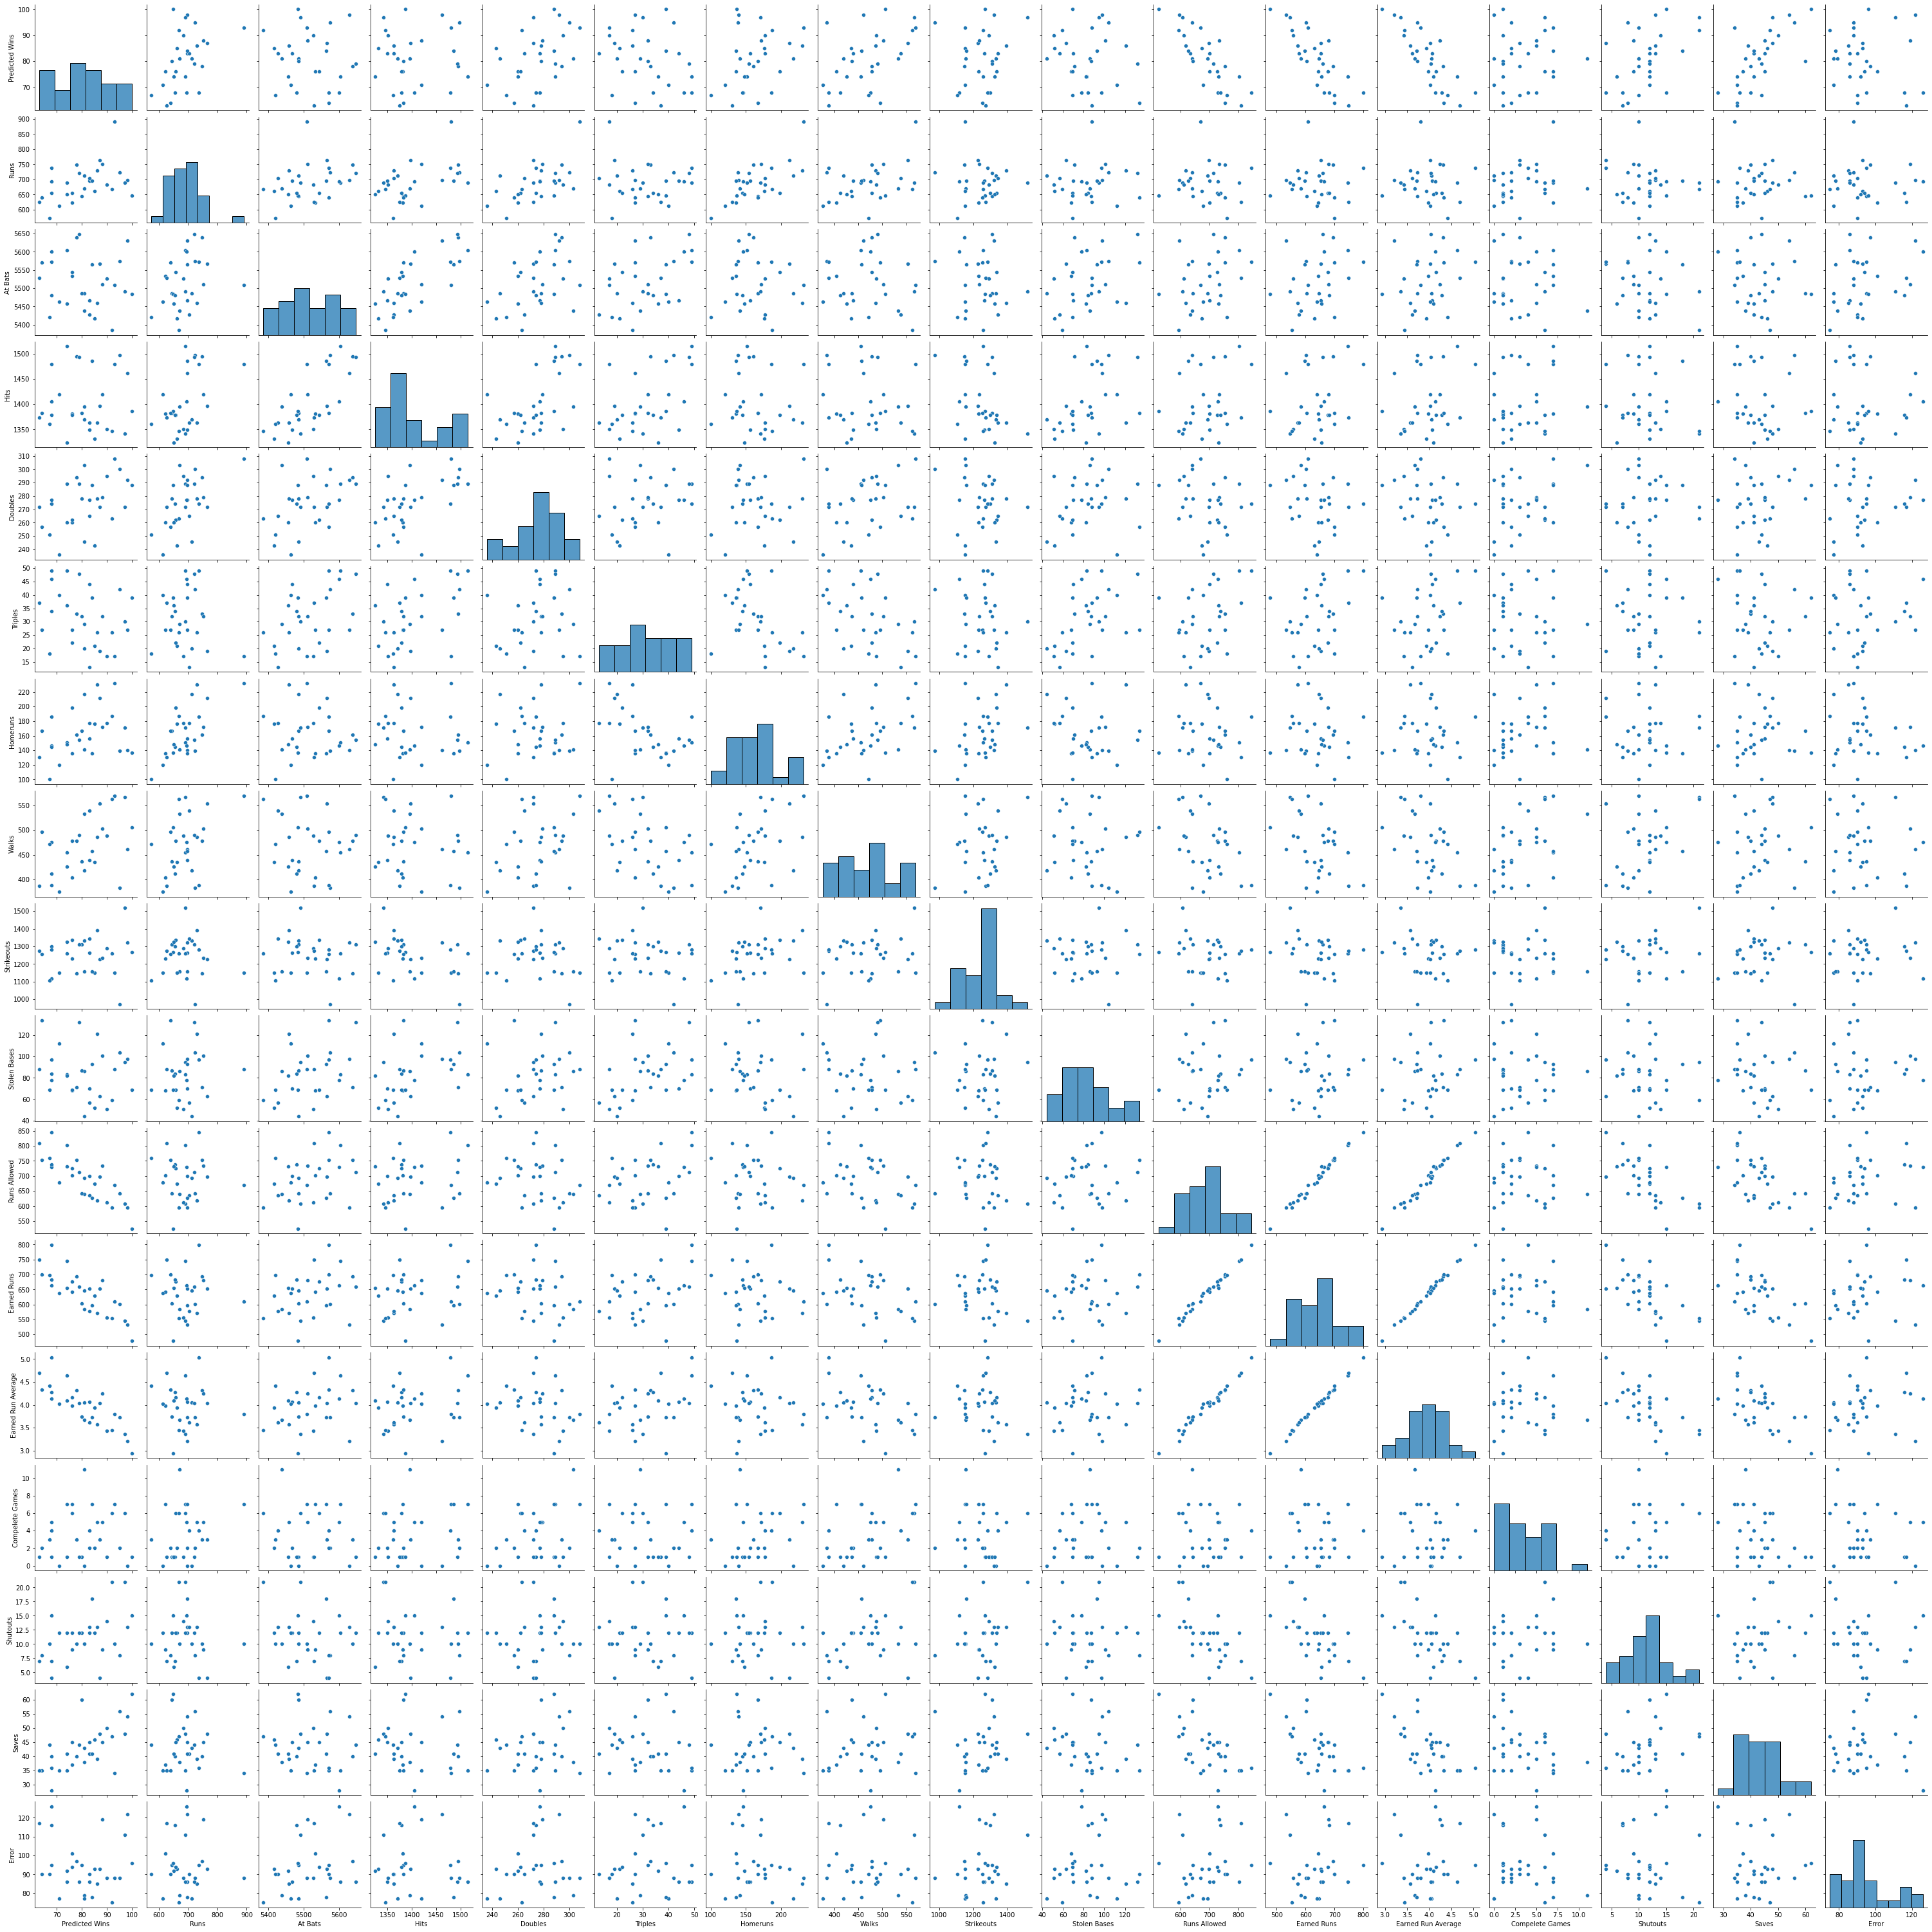

In [10]:
sns.pairplot(df)

Predicted Wins           AxesSubplot(0.125,0.749828;0.168478x0.130172)
Runs                  AxesSubplot(0.327174,0.749828;0.168478x0.130172)
At Bats               AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Hits                  AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Doubles                  AxesSubplot(0.125,0.593621;0.168478x0.130172)
Triples               AxesSubplot(0.327174,0.593621;0.168478x0.130172)
Homeruns              AxesSubplot(0.529348,0.593621;0.168478x0.130172)
Walks                 AxesSubplot(0.731522,0.593621;0.168478x0.130172)
Strikeouts               AxesSubplot(0.125,0.437414;0.168478x0.130172)
Stolen Bases          AxesSubplot(0.327174,0.437414;0.168478x0.130172)
Runs Allowed          AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Earned Runs           AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Earned Run Average       AxesSubplot(0.125,0.281207;0.168478x0.130172)
Compelete Games       AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Shutou

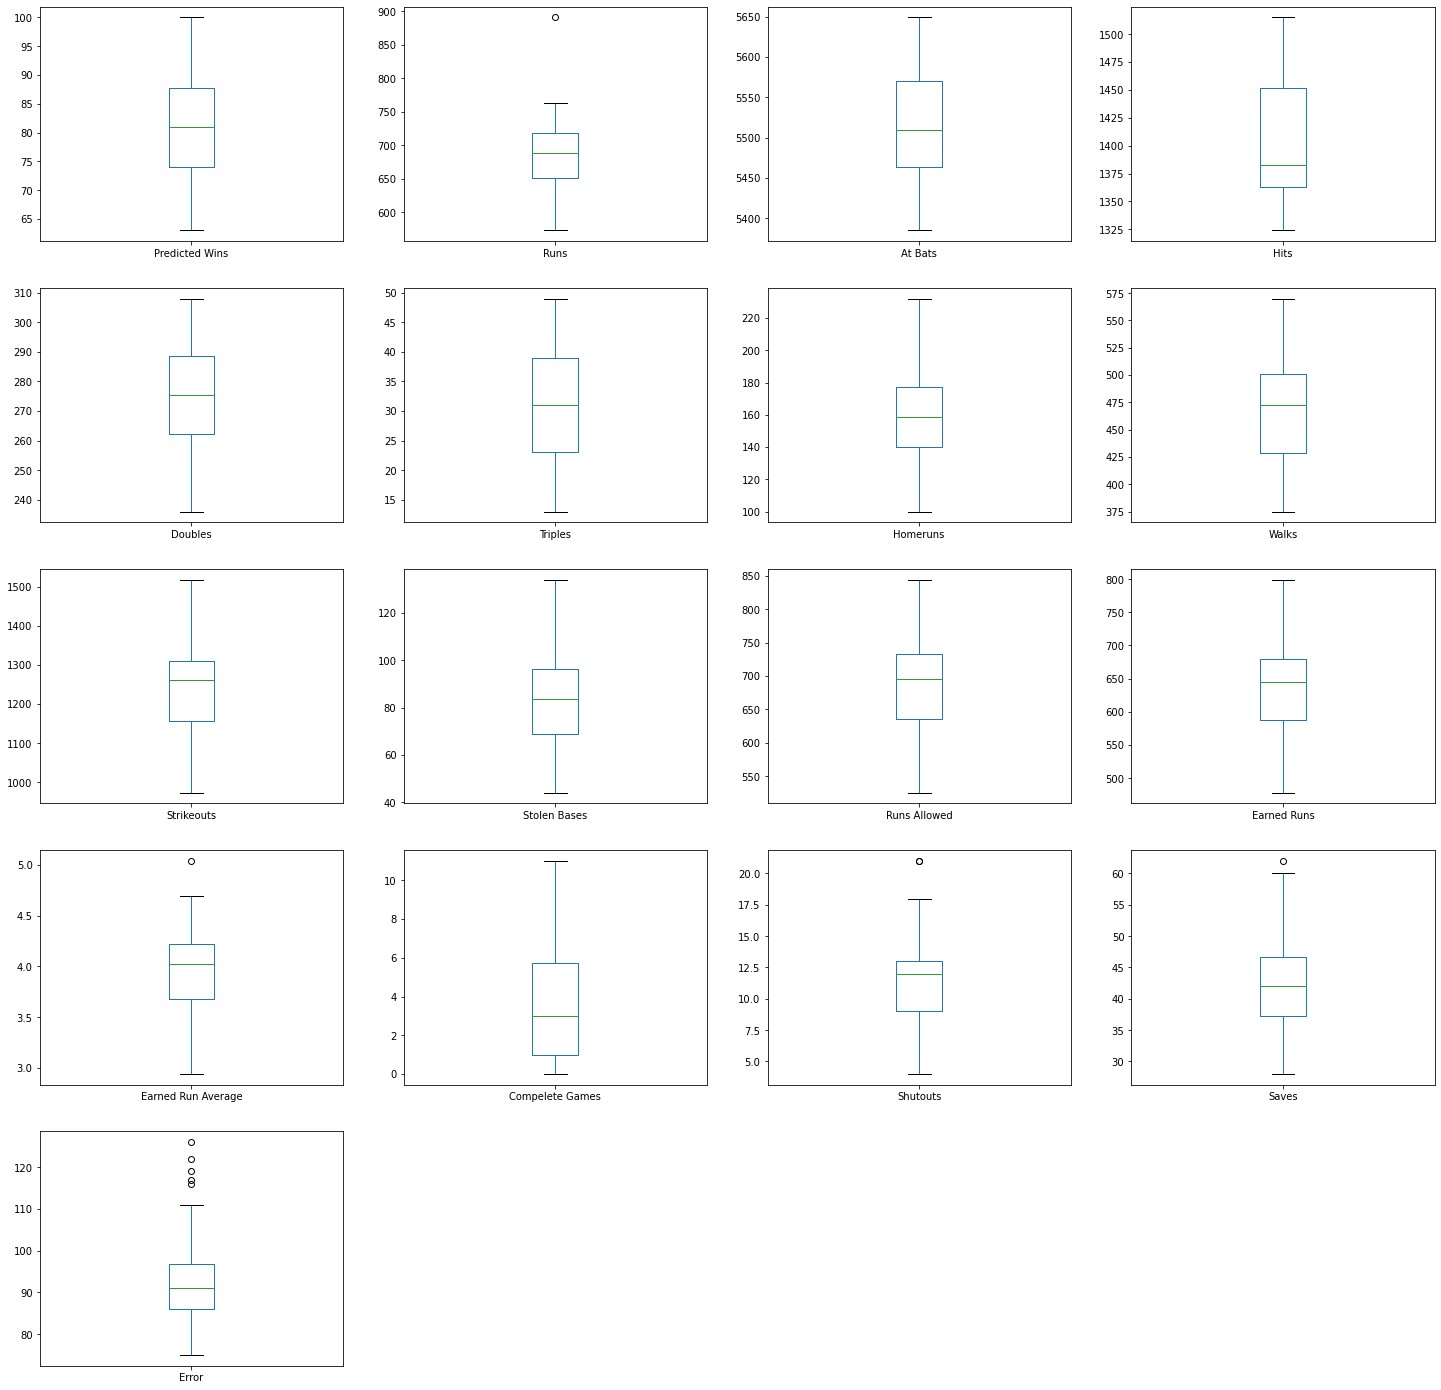

In [11]:
df.plot(kind='box',subplots=True,layout=(5,4),figsize=(25,25))

In [12]:
X=df.drop(columns="Predicted Wins")
Y=df["Predicted Wins"]

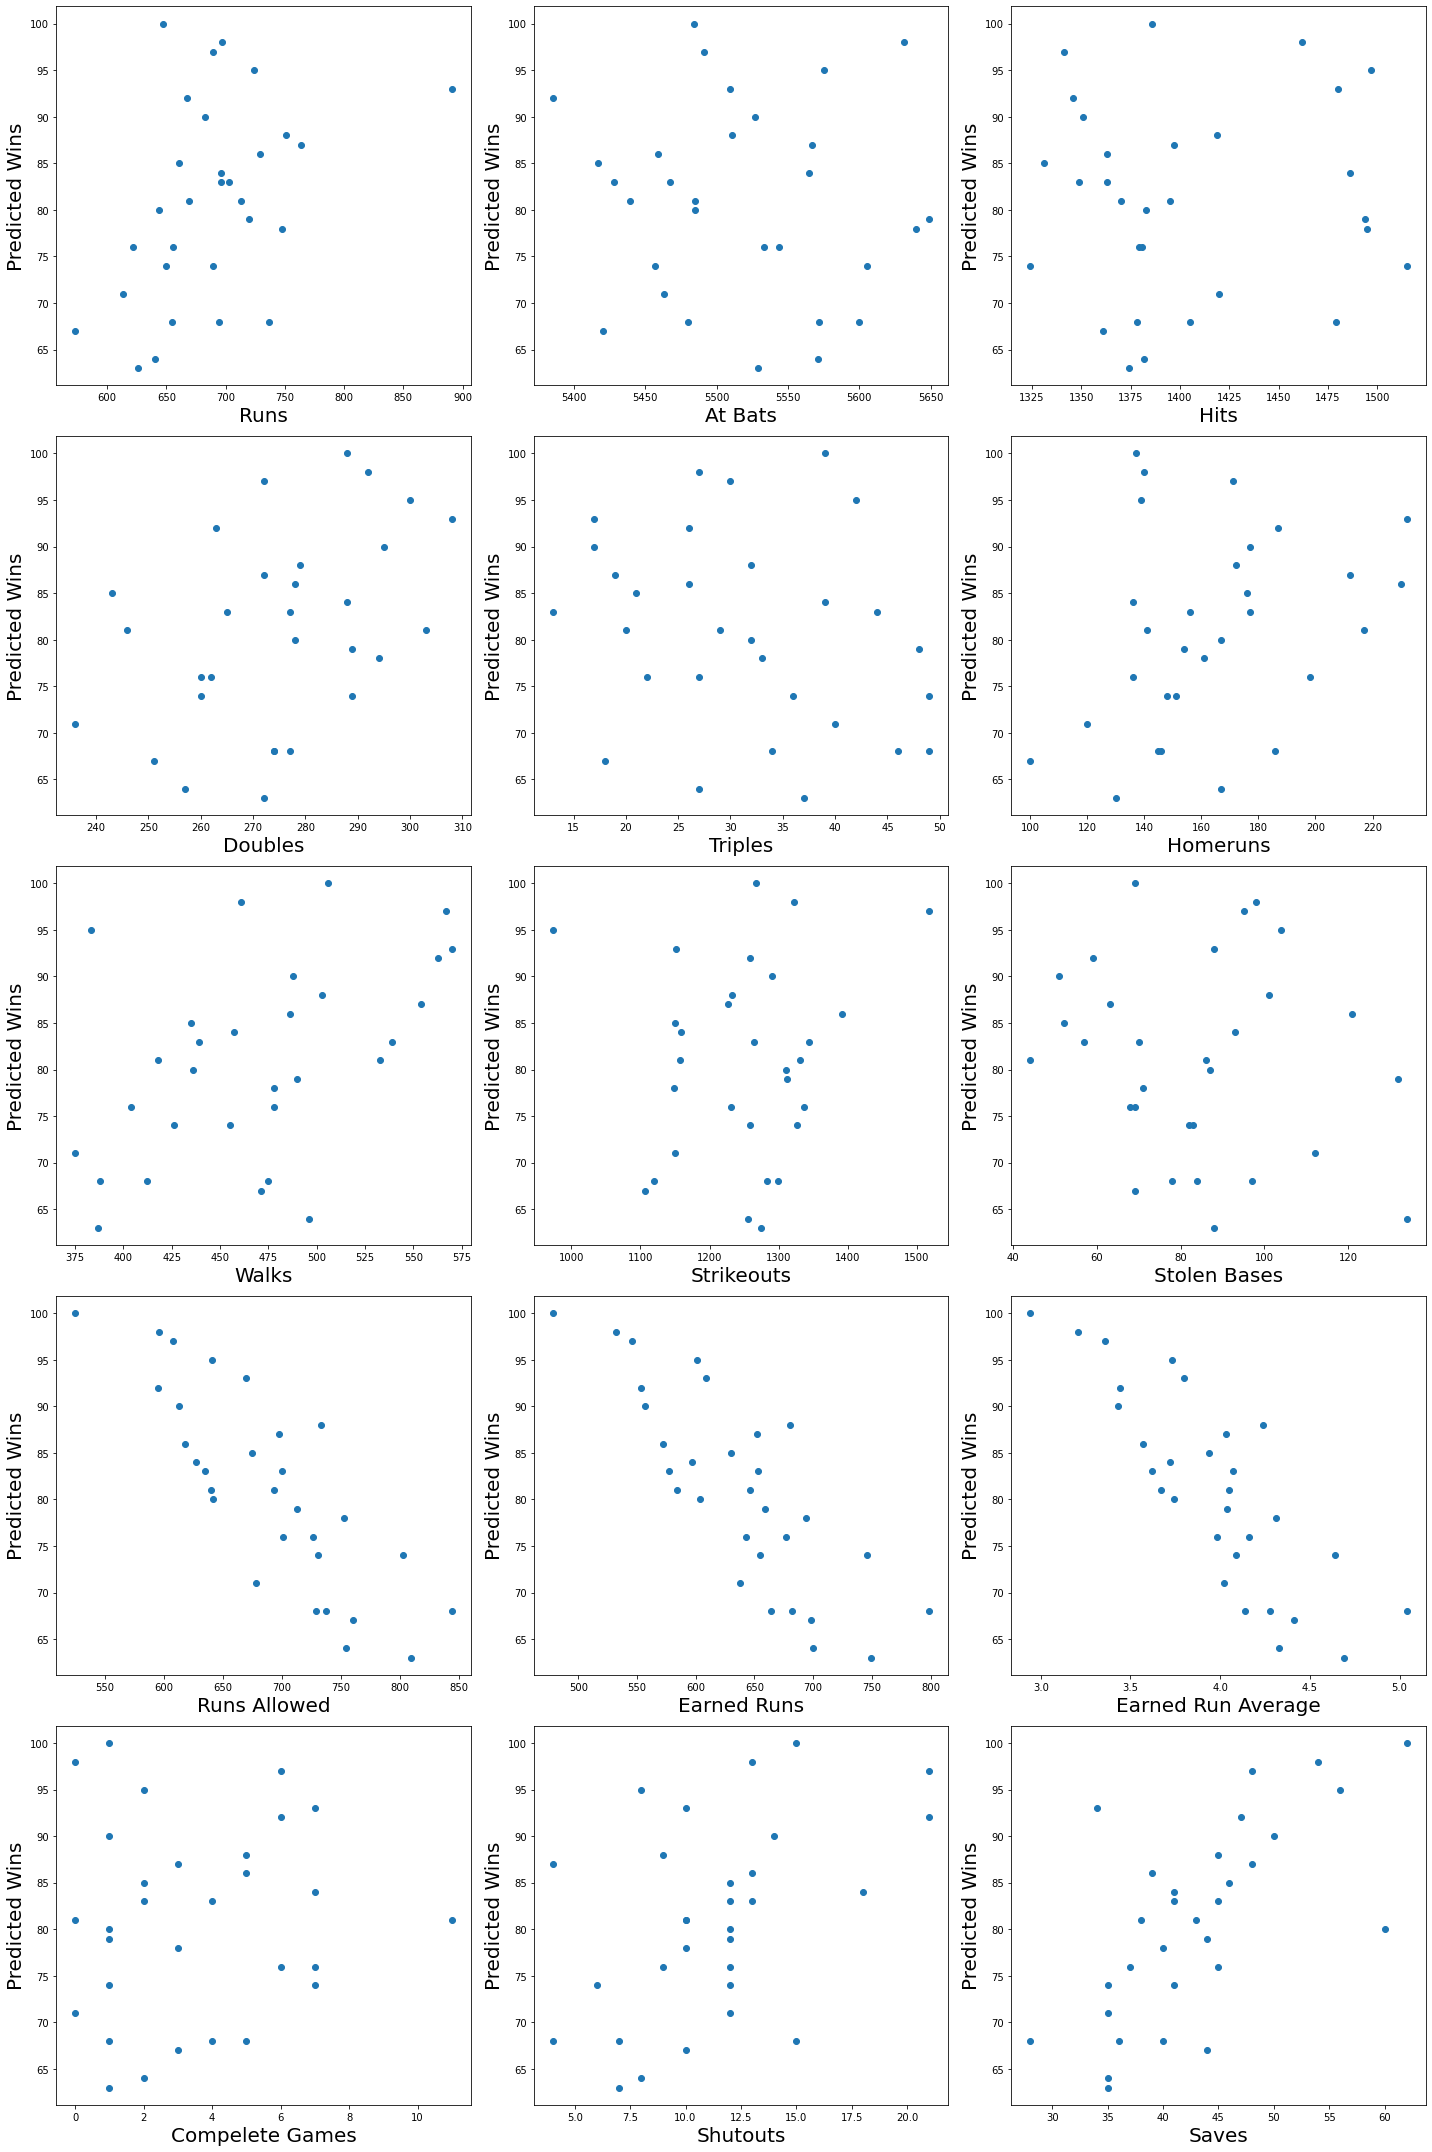

In [13]:
plt.figure(figsize=(20,30))
pltnumber=1

for column in X:
    if pltnumber<=15:
        ax=plt.subplot(5,3,pltnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Predicted Wins',fontsize=20)
    pltnumber+=1
plt.tight_layout()

0.04470076997798572
1.1398931660307043
0.17413429032352498
0.6362644174348592
-0.2189534077067715
0.12293523975827839
0.49025146140832154
0.15046085271433388
-0.14815122992357777
0.4555569751737513
0.04341475534967941
0.055732557686200515
0.0506268488741678
0.6994790420153237
0.5370985776239573
0.6241798071870271
0.8449922672006391


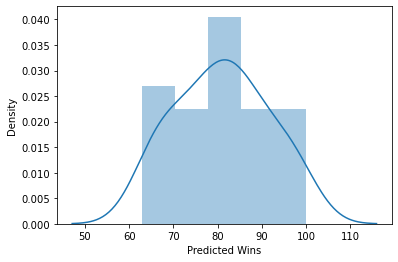

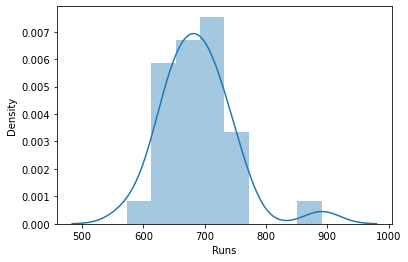

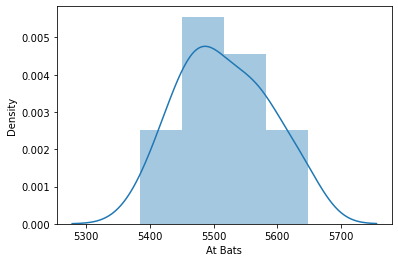

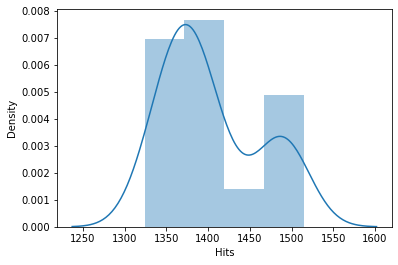

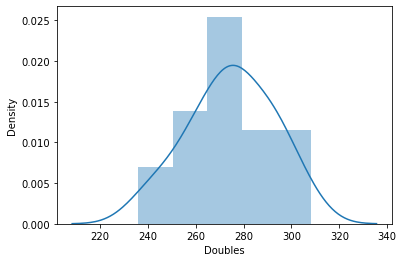

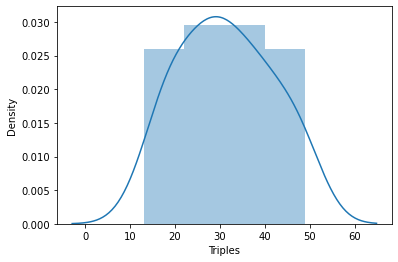

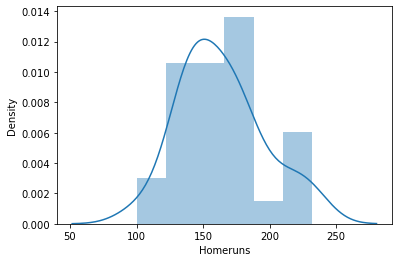

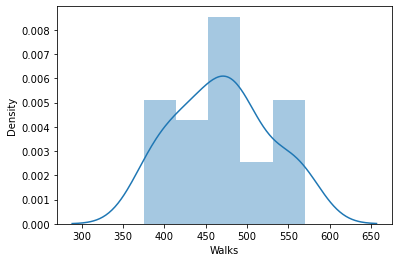

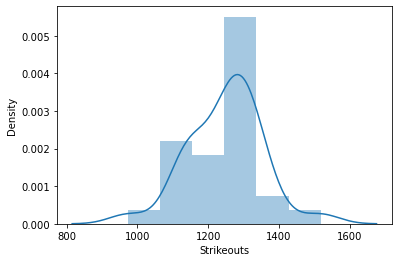

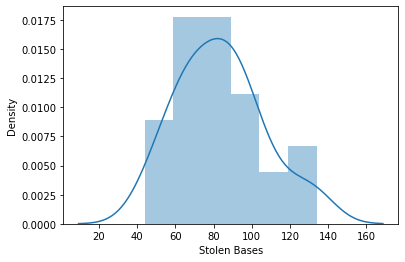

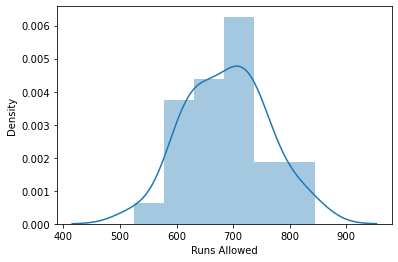

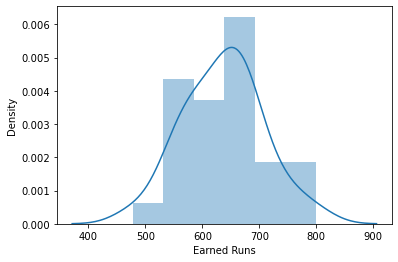

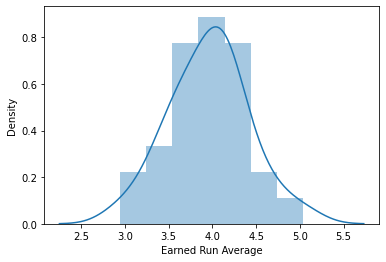

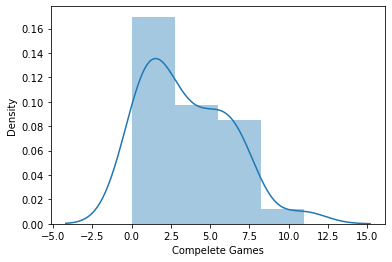

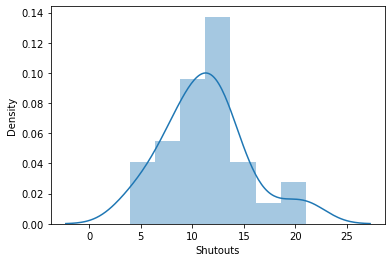

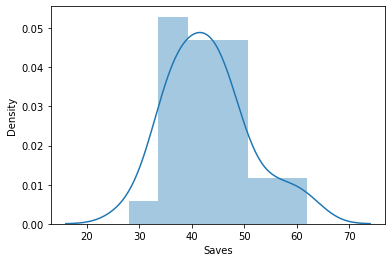

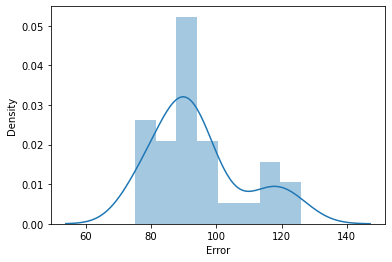

In [14]:
for col in df:
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show

In [15]:
df["Runs"]=np.sqrt(df["Runs"])
df.skew()

Predicted Wins        0.047089
Runs                  0.968676
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Compelete Games       0.736845
Shutouts              0.565790
Saves                 0.657524
Error                 0.890132
dtype: float64

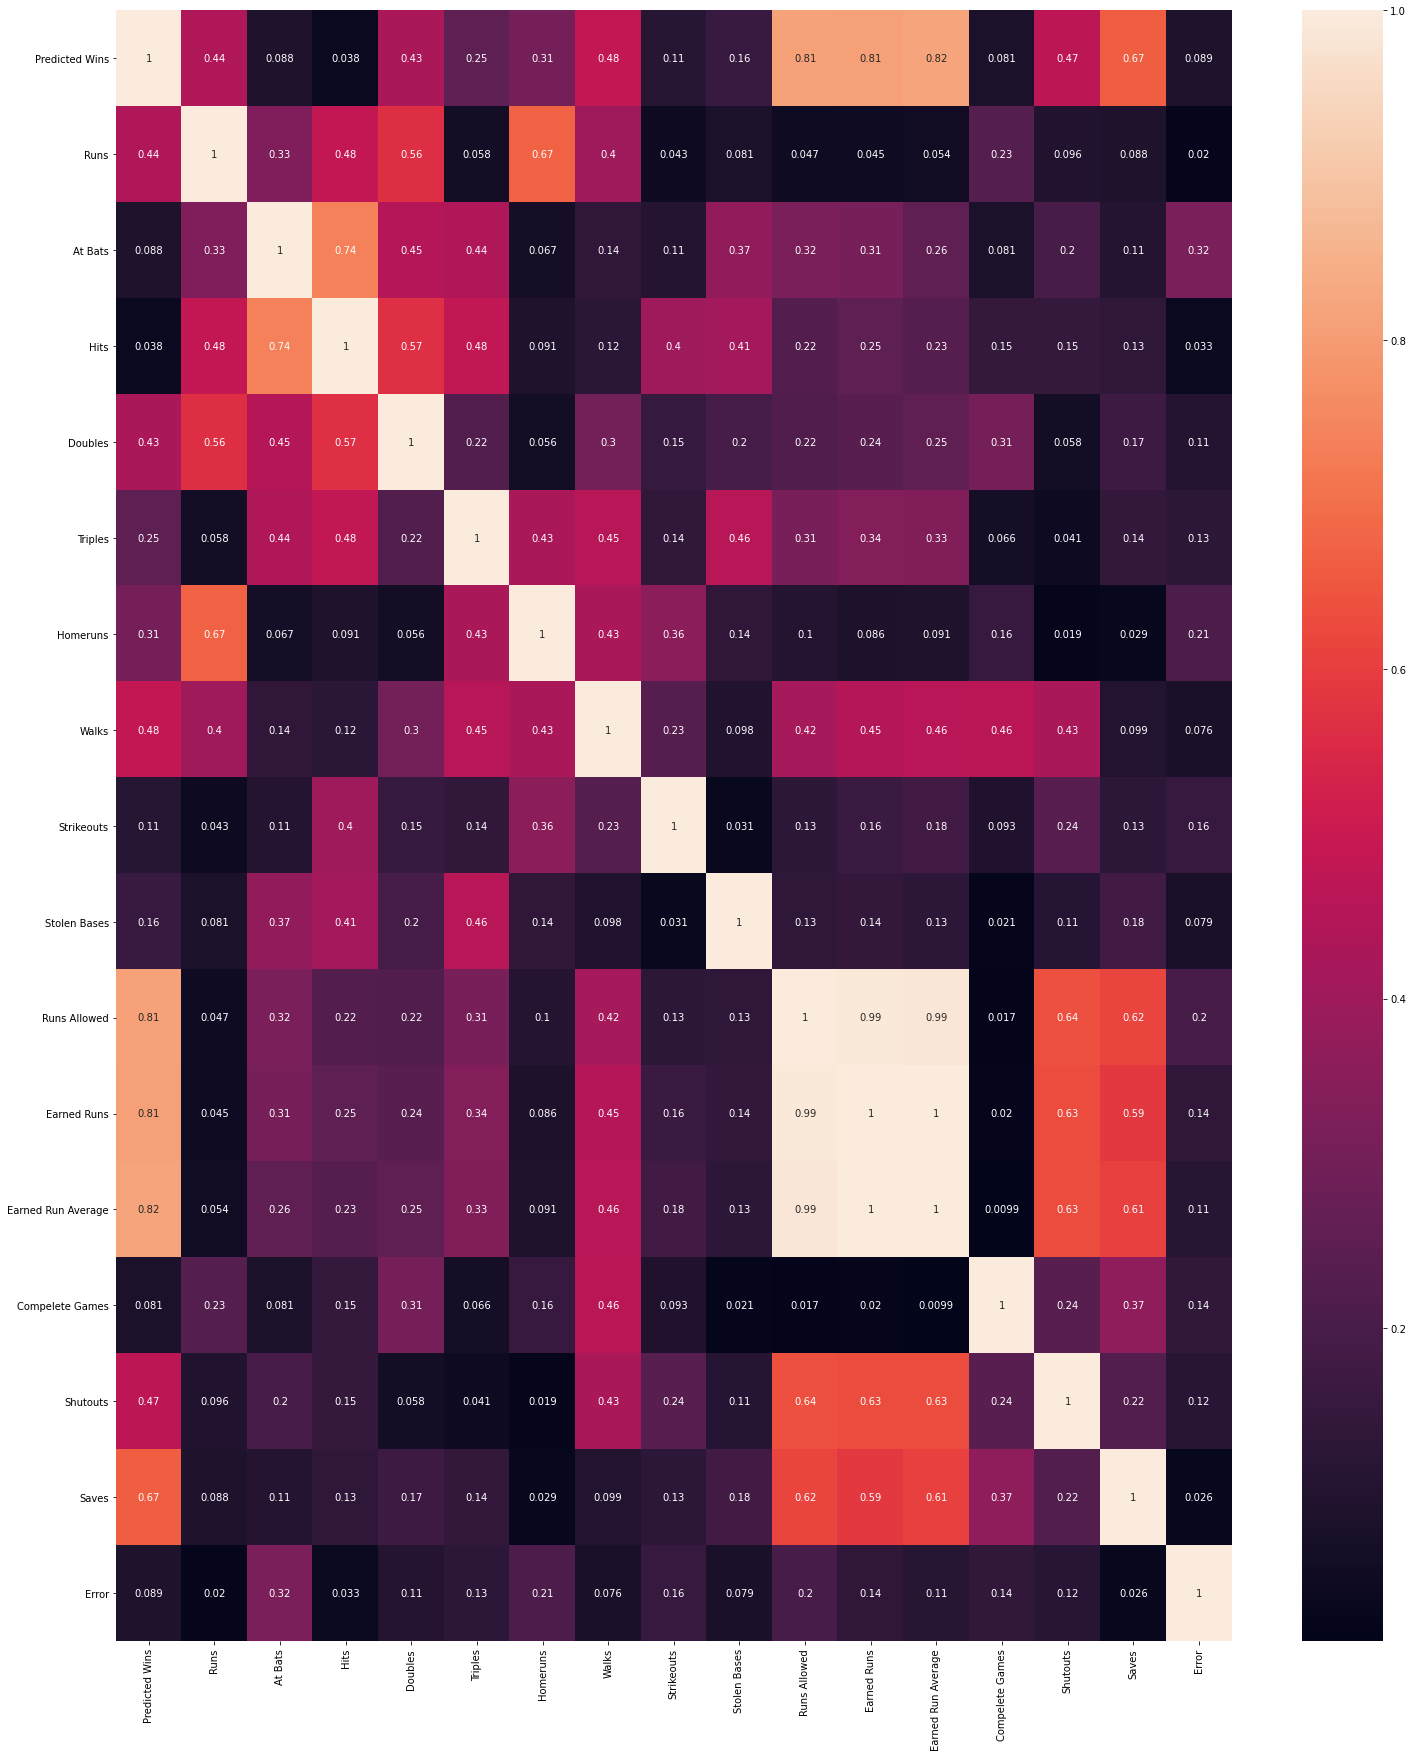

In [16]:
df_corr=df.corr().abs()
df_corr
plt.figure(figsize=(25,30))
sns.heatmap(df_corr,annot=True)
plt.show()


In [17]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

In [18]:
Spercentile=SelectPercentile(score_func=chi2,percentile=80)
Spercentile=Spercentile.fit(X,Y)
cols=Spercentile.get_support(indices=True)
feature=X.columns[cols]
df_scores=pd.DataFrame({'Features':X.columns,'Chi2Score':Spercentile.scores_,'pvalues':Spercentile.pvalues_})
df_scores.sort_values(by='Chi2Score',ascending=False)
print(cols)
print(feature)

[ 0  2  4  5  6  7  8  9 10 12 14 15]
Index(['Runs', 'Hits', 'Triples', 'Homeruns', 'Walks', 'Strikeouts',
       'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Compelete Games',
       'Saves', 'Error'],
      dtype='object')


In [19]:
df=df.drop(["At Bats","Doubles","Earned Run Average","Shutouts"],axis=1)

In [20]:
df

,Predicted Wins,Runs,Hits,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Compelete Games,Saves,Error
0,95,26.907248,1497,42,139,383,973,104,641,601,2,56,88
1,83,26.381812,1349,44,156,439,1264,70,700,653,2,45,86
2,81,25.865034,1395,29,141,533,1157,86,640,584,11,38,79
3,76,24.939928,1381,27,136,404,1231,68,701,643,7,37,101
4,74,26.248809,1515,49,151,455,1259,83,803,746,7,35,86
5,93,29.849623,1480,17,232,570,1151,88,670,609,7,34,88
6,87,27.640550,1397,19,212,554,1227,63,698,652,3,48,93
7,81,26.702060,1370,20,217,418,1331,44,693,646,0,43,77
8,80,25.377155,1383,32,167,436,1310,87,642,604,1,60,95
9,78,27.349589,1495,33,161,478,1148,71,753,694,3,40,97


# Model Training Using Linear Regression Without HyperParamter Tuning

In [21]:
X=df.drop(columns="Predicted Wins")
Y=df["Predicted Wins"]

In [22]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [24]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [25]:
Y_pred=lm.predict(X_test)
Y_pred_train=lm.predict(X_train)

In [26]:
lm.score(X_train,Y_train)
lm.score(X_test,Y_test)

0.6462784795728835

In [27]:
import statsmodels.formula.api as smf

In [28]:
est=smf.ols(formula='Y~X',data=df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     17.22
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           3.48e-07
Time:                        09:50:51   Log-Likelihood:                -73.812
No. Observations:                  30   AIC:                             173.6
Df Residuals:                      17   BIC:                             191.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.0954     34.121     -0.442      0.664     -87.085      56.895
X[0]           5.1372      1.803      2.850      0.011       1.334       8.941
X[1]          -0.0058      0.024     -0.240      0.813      -0.057       0.045
X[2]           0.0064      0.109      0.058      0.954      -0.224       0.237
X[3]          -0.0369      0.063     -0.582      0.568      -0.171       0.097
X[4]          -0.0131      0.021     -0.627      0.539      -0.057       0.031
X[5]           0.0053      0.010      0.506      0.619      -0.017       0.027
X[6]          -0.0231      0.039     -0.594      0.560      -0.105       0.059
X[7]           0.0172      0.113      0.152      0.881      -0.222       0.256
X[8]          -0.0974      0.117     -0.834      0.416      -0.344       0.149
X[9]           0.6362      0.359      1.774      0.094      -0.120       1.393
X[10]          0.5954      0.146      4.092      0.001       0.288       0.902
X[11]         -0.0092      0.064     -0.144      0.887      -0.144       0.126
==============================================================================
Omnibus:                        3.301   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.902
Skew:                          -0.539   Prob(JB):                        0.386
Kurtosis:                       3.601   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
from sklearn.metrics import r2_score

In [30]:
r2=r2_score(Y_test,Y_pred)

In [31]:
r2

0.6462784795728835

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
cross_val=cross_val_score(lm,X_train,Y_train,scoring="r2",cv=5)
cross_val

array([-1.03669072,  0.80382769, -0.04572205, -3.45487519,  0.88475369])

In [34]:
cross_val.mean()

-0.5697413188982344

In [35]:
mean_absolute_error(Y_test,Y_pred)


4.916645835426605

In [36]:
mean_squared_error(Y_test,Y_pred)

29.09359505513033

In [37]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

5.393847889506185

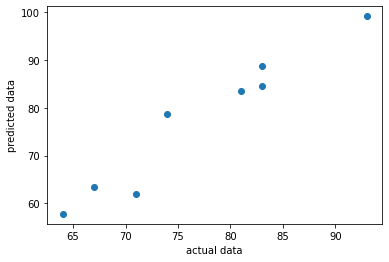

In [38]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Model Training Using Linear Regression With HyperParamter Tuning

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
ridge=Ridge()

In [41]:
parameters={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring="r2",cv=5)

In [42]:
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='r2')

In [43]:
print(ridge_regressor.best_params_)


{'alpha': 5}


In [44]:
print(ridge_regressor.best_score_)

0.6614744149485855


In [45]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([92.63781568, 71.57564363, 71.54581752, 73.2278037 , 78.25387806,
       87.38570933, 71.13918236, 80.13637777])

In [46]:
ridge_regressor.score(X_test,Y_test)

0.8245656778621686

In [47]:
y_pred=ridge_regressor.predict(X_test)

In [48]:
r2=r2_score(Y_test,y_pred)

In [49]:
r2

0.8245656778621686

In [50]:
cross_val=cross_val_score(ridge_regressor,X_train,Y_train,scoring="r2",cv=5)
cross_val

array([0.52477268, 0.84904381, 0.35939813, 0.59069528, 0.95172565])

In [51]:
cross_val.mean()

0.655127109391346

In [52]:
mean_absolute_error(Y_test,y_pred)


2.9238097042734363

In [53]:
mean_squared_error(Y_test,y_pred)

14.429472995836628

In [54]:
np.sqrt(mean_squared_error(Y_test,y_pred))

3.7986146153349947

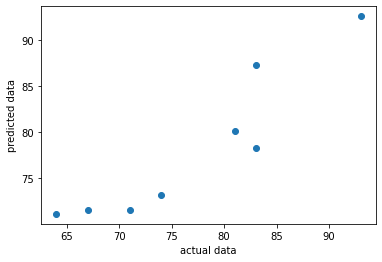

In [55]:
plt.scatter(Y_test,y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Model Training Using KNN Without HyperParamter Tuning


In [56]:
X=df.drop(columns="Predicted Wins")
Y=df["Predicted Wins"]

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
scaler=StandardScaler()

In [59]:
X_scaled=scaler.fit_transform(X)

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [61]:
knn=KNeighborsRegressor()

In [62]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [63]:
Y_pred=knn.predict(X_test)

In [64]:
knn.score(X_train,Y_train)

0.5904105702904888

In [65]:
knn.score(X_test,Y_test)

0.5408510638297874

In [66]:
r2=r2_score(Y_test,Y_pred)
r2

0.5408510638297874

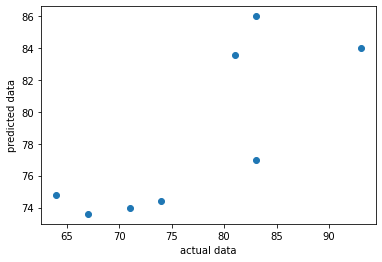

In [67]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# KNN MODEL USING HYPERPARAMETER TUNING

In [68]:
X=df.drop(columns="Predicted Wins")
Y=df["Predicted Wins"]

In [69]:
scaler=StandardScaler()

In [70]:
X_scaled=scaler.fit_transform(X)

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

In [72]:
knn=KNeighborsRegressor()

In [73]:
param_grid=[
    {'algorithm':['kd_tree','brute','ball_tree'],
    'leaf_size':[15,18,20],
    'n_neighbors':[3,5,7,13]
    }
]

In [74]:
clf=GridSearchCV(knn,param_grid,cv=3,n_jobs=-1)

In [75]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree', 'brute', 'ball_tree'],
                          'leaf_size': [15, 18, 20],
                          'n_neighbors': [3, 5, 7, 13]}])

In [76]:
clf.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [77]:
Y_pred=clf.predict(X_test)
Y_pred_train=clf.predict(X_train)

In [78]:
clf.score(X_train,Y_train)

0.6391762184325784

In [79]:
clf.score(X_test,Y_test)

0.3366726629861674

In [80]:
r2=r2_score(Y_test,Y_pred)
r2

0.3366726629861674

# DECISION TREE MODEL


In [81]:
X=df.drop(columns="Predicted Wins")
Y=df["Predicted Wins"]

In [82]:
from sklearn.tree import DecisionTreeRegressor

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [84]:
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [85]:
Y_pred=dt.predict(X_test)

In [86]:
r2=r2_score(Y_test,Y_pred)
r2

-0.378419452887538

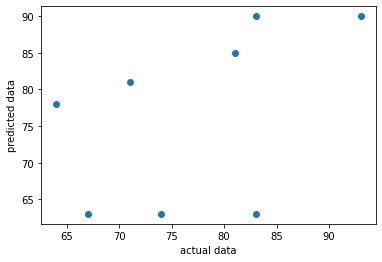

In [87]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# DECISION TREE WITH HYPER PARAMETER TUNING

In [88]:
X=df.drop(columns="Predicted Wins")
Y=df["Predicted Wins"]

In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [90]:
dt=DecisionTreeRegressor()


In [91]:
param_grid = {
               'max_depth': range(3,12,2),
               'min_samples_split': range(4,10,2),
               'min_samples_leaf': range(3,10,2),
              'criterion':["mse", "friedman_mse", "mae", "poisson"]}

In [92]:
clf=GridSearchCV(dt,param_grid,cv=5,n_jobs=-1)

In [93]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': range(3, 12, 2),
                         'min_samples_leaf': range(3, 10, 2),
                         'min_samples_split': range(4, 10, 2)})

In [94]:
clf.best_params_

{'criterion': 'poisson',
 'max_depth': 11,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [95]:
Y_pred=clf.predict(X_test)


In [96]:
clf.score(X_train,Y_train)

0.8358088946255662

In [97]:
clf.score(X_test,Y_test)

-0.5865124165167583

In [98]:
r2=r2_score(Y_test,Y_pred)
r2

-0.5865124165167583

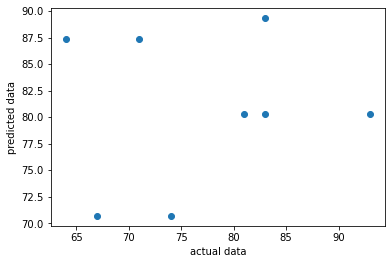

In [99]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

# Modeling Using Gradient Boosting

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
X=df.drop(columns="Predicted Wins")
Y=df["Predicted Wins"]

In [102]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=21)

In [103]:
gbdt=GradientBoostingRegressor()

In [104]:
gbdt.fit(X_train,Y_train)

GradientBoostingRegressor()

In [105]:
Y_pred=gbdt.predict(X_test)


In [106]:
r2=r2_score(Y_test,Y_pred)
r2

0.22301192902758216

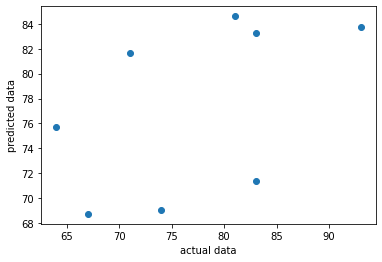

In [107]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')
plt.show()

In [108]:
md=[lm,knn,dt,gbdt]
import pickle
filename="Baseball.pkl"
pickle.dump(md,open(filename,"wb"))

# Conclusion:
Conducted 4 models on BaseBall dataset namely, Linear Regression, KNN, Desicion Tree and Gradient Boosting with Hyperparameter tuning
It comes to a conclusion that Linear Regression model is providing best score for BaseBall dataset
r2_score=0.0.8245656778621684